# Part 1

# Fraud Detection by Self-Organizing Map

In [283]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Importing the dataset
dataset = pd.read_csv('data/Mega_Case_Study/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print (dataset.shape)
dataset.head()

(690, 16)


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [284]:
# we want to train model as unsupervise model so no dependent variable

# feature scaling 

from sklearn.preprocessing import MinMaxScaler

SC=MinMaxScaler()

X = SC.fit_transform(X)

# here we use MiniSom a numpy base self-organizing 
# we need to move minisome to our working directory

from minisom import MiniSom

# this is an unspervise MLL and we dont use Y values


# MiniSom(self, X, y, input_len , sigma , leraning_rate , random_state

#we can choose any dimension we want by it should not be small

# x, y is grid here is 10 by 10 grid , 

# input_len ==> is number of features we have  here is 14 +1=15  ==>14 attribute + customer ID , we need customerID to indetifu=y them later

# sigma is radius of different neighbir in grid and by default is 1.0

# learning rate ==> decide how much weight learn in each iterarion , lower ==> slow , hig==> fast learn weight 

# deacy_feature = None  



som = MiniSom(x=10 , y=10 , input_len=15 , sigma =1.0 , learning_rate=0.1)

# initial weight
som.random_weights_init(X)

# train self - organizing map on X
# number of iteration 
# tarin (dat, num_iteration)

%time som.train_random(data=X,num_iteration=100)

CPU times: user 125 ms, sys: 2.61 ms, total: 128 ms
Wall time: 128 ms


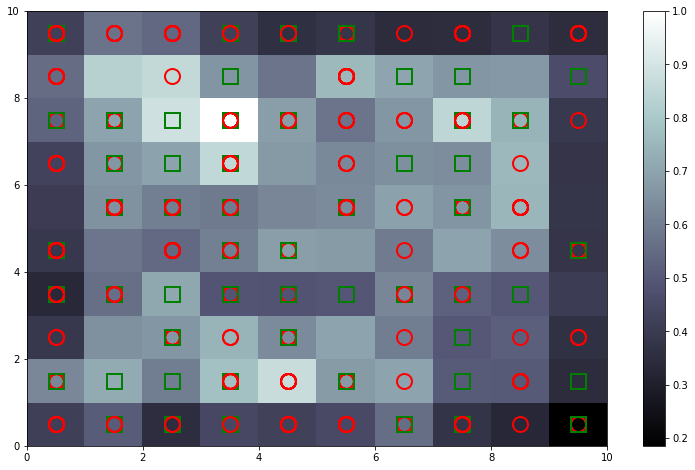

In [285]:
plt.figure(figsize=(13,8))
# we need to add legend to these colors

from pylab import bone,pcolor, colorbar , plot , show
bone() 
pcolor(som.distance_map().T)
colorbar()






# fraus is actually is an outlier so when we see 1 (shite in above) its an outlier

# now we can check if the white one (frause) got approval or not

# we can add markers here green for custmer did get approval and red for customers didn't get approvl

markers=['o','s']  # circle for not approve and square for approve
colors =['r', 'g']  # red not approcve and green approved


# now we loop through customers


for i,x in enumerate(X):  # i index of X and X is row
    # for each row we get the winning node
    winner=som.winner(x)
    #here we want to plot with coordinate the winning 
    plot(winner[0]+0.5,  # winner[0] is at the border so we want it to put it on the middle so we add 0.5
        winner[1]+0.5,
        markers[y[i]] , # here we use y variable to figure out customer is approve or not
            # y[i]=1 ==> marker[1] ==> s
            # y[i]=0 not approved ==> markers[0]  ==> o
         markeredgecolor=colors[y[i]],
        markerfacecolor = 'None',
         markersize=15,
         markeredgewidth=2)
    
    
    

# Trainnig ANN model with output

- we can use only outliers like whits with green like (5,4) or (6,3) 
- or we can put lower for threshhold and use (7,5) and (4,4) to train model

In [286]:
mapping=som.win_map(X)

frauds=np.concatenate((mapping[(3,7)],mapping[(7,7)]))

frauds=SC.inverse_transform(frauds)

Frauds=pd.DataFrame(frauds)

print (Frauds.shape)

Frauds.head()

# 


(19, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15655658.0,1.0,22.58,1.50,1.0,6.0,4.0,0.540,0.0,0.0,0.0,1.0,2.0,120.0,68.0
1,15681755.0,1.0,19.00,1.75,1.0,8.0,4.0,2.335,0.0,0.0,0.0,1.0,2.0,112.0,7.0
2,15643056.0,1.0,18.83,3.54,1.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,2.0,180.0,2.0
3,15709252.0,1.0,23.08,2.50,2.0,1.0,1.0,0.085,0.0,0.0,0.0,1.0,2.0,100.0,4209.0
4,15596165.0,1.0,40.92,0.50,1.0,7.0,4.0,0.500,0.0,0.0,0.0,1.0,2.0,130.0,1.0


In [287]:
# we only want to keep customerID 
# keep IDs and put it in numpy array

FR=np.array(Frauds[0])
FR

array([15655658., 15681755., 15643056., 15709252., 15596165., 15631451.,
       15632503., 15569917., 15745375., 15654625., 15670029., 15763579.,
       15782159., 15795527., 15802869., 15645820., 15750545., 15749964.,
       15665014.])

In [288]:
dataset['Fraud']=0  # creat a new columns and set all to 0


dataset[dataset.CustomerID.isin(FR)]


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,Fraud
41,15655658,1,22.58,1.500,1,6,4,0.540,0,0,0,1,2,120,68,0,0
53,15681755,1,19.00,1.750,1,8,4,2.335,0,0,0,1,2,112,7,0,0
142,15643056,1,18.83,3.540,1,1,1,0.000,0,0,0,1,2,180,2,0,0
161,15745375,0,33.08,1.625,2,2,4,0.540,0,0,0,1,2,0,1,0,0
166,15709252,1,23.08,2.500,2,1,1,0.085,0,0,0,1,2,100,4209,0,0
177,15654625,0,53.33,0.165,2,1,1,0.000,0,0,0,1,1,62,28,0,0
209,15596165,1,40.92,0.500,1,7,4,0.500,0,0,0,1,2,130,1,0,0
245,15670029,0,16.92,0.500,2,3,4,0.165,0,1,6,1,2,240,36,0,0
246,15763579,0,16.00,0.165,2,6,4,1.000,0,1,2,1,2,320,2,0,0
251,15631451,1,24.50,13.335,1,6,4,0.040,0,0,0,1,2,120,476,0,0


In [289]:
# change value on fraud column for fraud 

for i in range(len(dataset)):
    if dataset.CustomerID[i] in FR: dataset.Fraud[i]=1

In [290]:
dataset[dataset.CustomerID.isin(FR)]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,Fraud
41,15655658,1,22.58,1.500,1,6,4,0.540,0,0,0,1,2,120,68,0,1
53,15681755,1,19.00,1.750,1,8,4,2.335,0,0,0,1,2,112,7,0,1
142,15643056,1,18.83,3.540,1,1,1,0.000,0,0,0,1,2,180,2,0,1
161,15745375,0,33.08,1.625,2,2,4,0.540,0,0,0,1,2,0,1,0,1
166,15709252,1,23.08,2.500,2,1,1,0.085,0,0,0,1,2,100,4209,0,1
177,15654625,0,53.33,0.165,2,1,1,0.000,0,0,0,1,1,62,28,0,1
209,15596165,1,40.92,0.500,1,7,4,0.500,0,0,0,1,2,130,1,0,1
245,15670029,0,16.92,0.500,2,3,4,0.165,0,1,6,1,2,240,36,0,1
246,15763579,0,16.00,0.165,2,6,4,1.000,0,1,2,1,2,320,2,0,1
251,15631451,1,24.50,13.335,1,6,4,0.040,0,0,0,1,2,120,476,0,1


### Build and Train ANN model

- assign values for ANN


In [291]:
dataset.shape

(690, 17)

In [292]:
X=dataset.iloc[:,1:16].values
y=dataset.Fraud

# split dataset to test

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test= train_test_split(X,y, stratify=y)
# scaling 

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print (X_train.shape , X_test.shape)




(517, 15) (173, 15)


In [293]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout



predictor=Sequential()

predictor.add(Dense( output_dim= 8 ,activation='relu' , input_dim=15 ))
predictor.add(Dropout(rate=0.2))
predictor.add(Dense(output_dim= 8 ,activation='relu'  ))
predictor.add(Dropout(rate=0.2))
predictor.add(Dense(output_dim=1  ,activation='sigmoid' ))


predictor.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])

predictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=8)`
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8)`
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [294]:
predictor.fit(X_train, y_train, epochs=10 , batch_size=12, verbose=2 , shuffle=True,validation_split=0.01)

Train on 511 samples, validate on 6 samples
Epoch 1/10
 - 0s - loss: 0.6889 - acc: 0.6204 - val_loss: 0.5110 - val_acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.5298 - acc: 0.8219 - val_loss: 0.3709 - val_acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.3989 - acc: 0.9198 - val_loss: 0.2550 - val_acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.2995 - acc: 0.9569 - val_loss: 0.1701 - val_acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.2363 - acc: 0.9667 - val_loss: 0.1149 - val_acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.2097 - acc: 0.9687 - val_loss: 0.0787 - val_acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.1715 - acc: 0.9726 - val_loss: 0.0576 - val_acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.1585 - acc: 0.9726 - val_loss: 0.0436 - val_acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.1488 - acc: 0.9726 - val_loss: 0.0338 - val_acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.1550 - acc: 0.9706 - val_loss: 0.0275 - val_acc: 1.0000


In [295]:
# getting probability

predictor.predict(X_test)

array([[6.88702166e-02],
       [7.16860518e-02],
       [8.92952736e-03],
       [2.41525448e-03],
       [1.33425687e-02],
       [5.40549494e-03],
       [4.74222079e-02],
       [1.38757944e-01],
       [5.40667623e-02],
       [1.36681229e-01],
       [4.17169891e-02],
       [1.74927479e-03],
       [1.93098828e-01],
       [4.10884246e-03],
       [2.16195988e-03],
       [9.47901234e-02],
       [2.86070444e-02],
       [5.04296869e-02],
       [7.52428323e-02],
       [6.00534081e-02],
       [4.14601527e-02],
       [6.98869303e-02],
       [5.92130385e-02],
       [4.82304320e-02],
       [1.38659373e-01],
       [8.02368969e-02],
       [4.55542207e-02],
       [4.79826033e-02],
       [6.45599663e-02],
       [3.88426986e-03],
       [6.32436872e-02],
       [5.51401521e-04],
       [6.62083458e-03],
       [1.69554293e-01],
       [3.42378840e-02],
       [1.09102288e-02],
       [2.65180692e-02],
       [4.08532843e-02],
       [3.19644623e-02],
       [7.13701323e-02],


In [299]:
dataset['prob']=predictor.predict(X)

In [302]:
dataset.prob.astype(float)

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      1.195968e-05
4      0.000000e+00
5      8.246755e-33
6      0.000000e+00
7      0.000000e+00
8      0.000000e+00
9      0.000000e+00
10     0.000000e+00
11     0.000000e+00
12     0.000000e+00
13     0.000000e+00
14     0.000000e+00
15     0.000000e+00
16     0.000000e+00
17     0.000000e+00
18     0.000000e+00
19     0.000000e+00
20     0.000000e+00
21     0.000000e+00
22     0.000000e+00
23     0.000000e+00
24     0.000000e+00
25     1.344417e-07
26     0.000000e+00
27     0.000000e+00
28     0.000000e+00
29     0.000000e+00
           ...     
660    0.000000e+00
661    0.000000e+00
662    0.000000e+00
663    0.000000e+00
664    0.000000e+00
665    0.000000e+00
666    0.000000e+00
667    5.739684e-26
668    0.000000e+00
669    1.170500e-26
670    0.000000e+00
671    9.680981e-06
672    1.762354e-15
673    0.000000e+00
674    0.000000e+00
675    1.365967e-08
676    0.000000e+00
677    0.000000e+00
678    0.000000e+00


In [304]:
# customer with high probability of fraud

dataset[dataset.CustomerID.isin(FR)].sort_values(by='prob', ascending=False)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class,Fraud,prob
161,15745375,0,33.08,1.625,2,2,4,0.540,0,0,0,1,2,0,1,0,1,1.120173e-07
177,15654625,0,53.33,0.165,2,1,1,0.000,0,0,0,1,1,62,28,0,1,4.567351e-28
415,15802869,0,30.25,5.500,2,4,4,5.500,0,0,0,1,1,100,1,0,1,6.832547e-34
53,15681755,1,19.00,1.750,1,8,4,2.335,0,0,0,1,2,112,7,0,1,2.039724e-37
41,15655658,1,22.58,1.500,1,6,4,0.540,0,0,0,1,2,120,68,0,1,0.000000e+00
308,15782159,0,22.67,0.750,2,8,4,2.000,0,1,2,1,2,200,395,0,1,0.000000e+00
617,15749964,0,27.58,3.000,2,7,4,2.790,0,1,1,1,2,280,11,0,1,0.000000e+00
568,15750545,0,45.00,4.585,2,4,8,1.000,0,0,0,1,1,240,1,0,1,0.000000e+00
555,15569917,1,19.17,4.000,1,3,4,1.000,0,0,0,1,2,360,1001,0,1,0.000000e+00
498,15645820,0,18.08,0.375,3,13,1,10.000,0,0,0,1,1,300,1,1,1,0.000000e+00
